<a href="https://colab.research.google.com/github/Manu0504/Student_Exam_Marks_Prediction/blob/main/Manu_Kumar_python%2BAI/ML(TM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SmartScore: Predicting Student Performance with ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, mean_squared_error

## Load dataset

In [2]:
df = pd.read_csv('/content/student_data.csv')
df

,StudentID,AttendanceRate,StudyTime,FinalExamScore,Pass/Fail
0,1,85,8,78,1
1,2,60,5,55,0
2,3,90,10,85,1
3,4,75,7,72,1
4,5,50,3,40,0
5,6,95,12,92,1
6,7,65,4,50,0
7,8,80,6,68,1
8,9,55,2,35,0
9,10,70,5,60,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   StudentID       25 non-null     int64
 1   AttendanceRate  25 non-null     int64
 2   StudyTime       25 non-null     int64
 3   FinalExamScore  25 non-null     int64
 4   Pass/Fail       25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [4]:
df.describe()

,StudentID,AttendanceRate,StudyTime,FinalExamScore,Pass/Fail
count,25.000000,25.000000,25.000000,25.00000,25.0
mean,13.000000,71.600000,6.240000,63.52000,0.6
std,7.359801,15.049917,2.847221,18.29417,0.5
min,1.000000,45.000000,2.000000,30.00000,0.0
25%,7.000000,60.000000,4.000000,50.00000,0.0
50%,13.000000,72.000000,6.000000,65.00000,1.0
75%,19.000000,85.000000,8.000000,78.00000,1.0
max,25.000000,95.000000,12.000000,92.00000,1.0


In [5]:
df.isnull().sum()

,0
StudentID,0
AttendanceRate,0
StudyTime,0
FinalExamScore,0
Pass/Fail,0


In [6]:
df.columns

Index(['StudentID', 'AttendanceRate', 'StudyTime', 'FinalExamScore',
       'Pass/Fail'],
      dtype='object')

In [7]:
df.shape

(25, 5)

In [8]:
df['Pass/Fail'].value_counts()

,count
Pass/Fail,
1,15
0,10


# ------------------- Linear Regression -------------------

In [9]:
x = df[['StudyTime']]
y = df['FinalExamScore']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [13]:
lr_mse_train = mean_squared_error(y_train,y_pred_train)
lr_mse_test = mean_squared_error(y_test,y_pred_test)

In [14]:
lr_r2_train = r2_score(y_train,y_pred_train)
lr_r2_test = r2_score(y_test,y_pred_test)

In [15]:
print('Training MSE:', lr_mse_train)
print('Testing MSE:', lr_mse_test)
print('Training R2:', lr_r2_train)
print('Testing R2:', lr_r2_test)

Training MSE: 10.924715909090907
Testing MSE: 19.93112086776857
Training R2: 0.9584117405316549
Testing R2: 0.9620677510890518


### Plot (Data Visulaization)

/tmp/ipython-input-16-1403126402.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


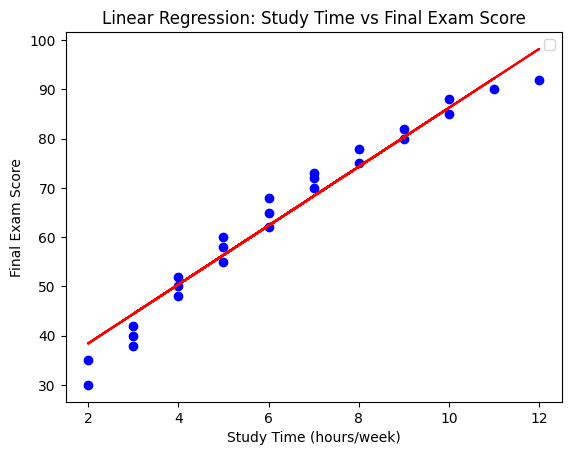

In [16]:
plt.scatter(x, y, color='blue')
plt.plot(x, lr_model.predict(x), color='red')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Exam Score')
plt.title('Linear Regression: Study Time vs Final Exam Score')
plt.legend()
plt.show()

# ------------------- Logistic Regression -------------------

In [17]:
X_log = df[['StudyTime', 'AttendanceRate']]
y_log = df['Pass/Fail']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [19]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [22]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'R2 Score: {r2}')

Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
R2 Score: 0.16666666666666674


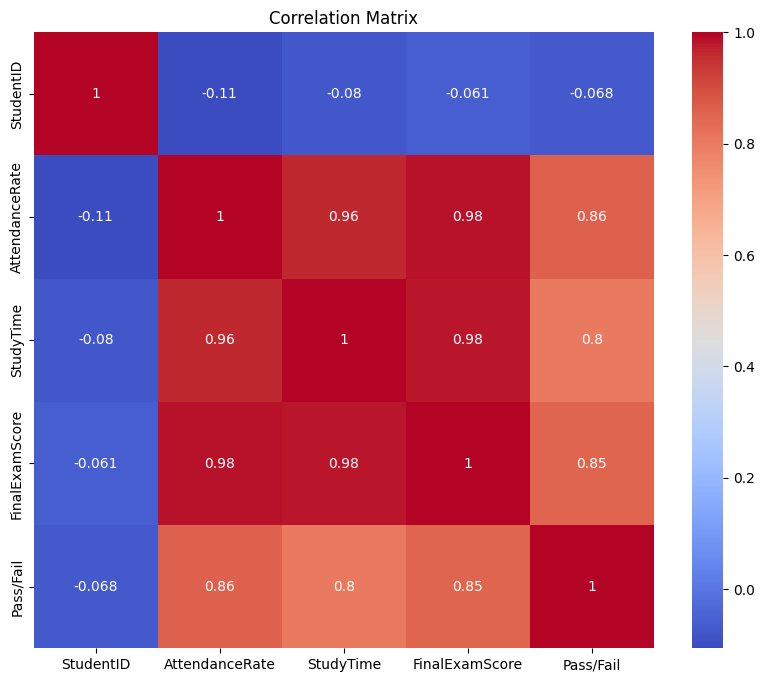

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ------------------- K-Means Clustering -------------------

In [24]:
k = 3
model_kmeans = KMeans(n_clusters=k, random_state=42)

In [25]:
columns_for_clustering = ['StudyTime', 'AttendanceRate']
df_for_clustering = df[columns_for_clustering]

In [26]:
model_kmeans.fit(df_for_clustering)

KMeans(n_clusters=3, random_state=42)

In [27]:
cluster_labels = model_kmeans.labels_

In [28]:
cluster_centers = model_kmeans.cluster_centers_

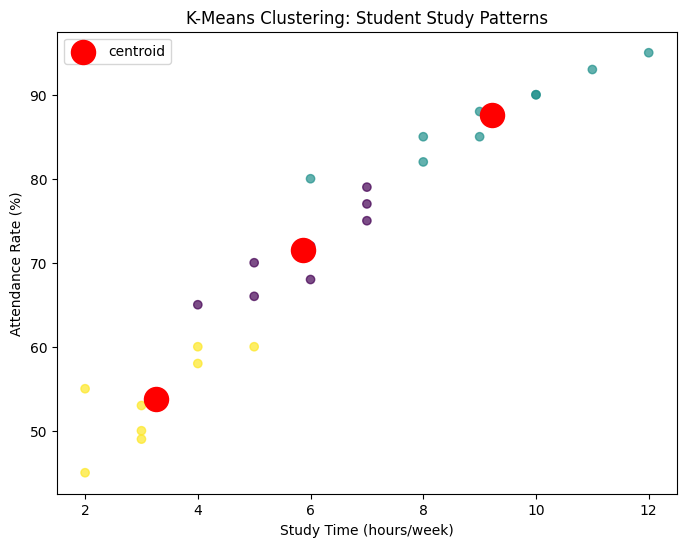

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df_for_clustering['StudyTime'], df_for_clustering['AttendanceRate'], c = cluster_labels, cmap = 'viridis', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c = 'red', marker='o', s = 300, label = 'centroid')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Attendance Rate (%)')
plt.title('K-Means Clustering: Student Study Patterns')
plt.legend()
plt.show()